# Linjär klassificering. Rapport.

 Algoritmen undersöker den gränsen som separerar olika klasser baserad på indata för den linjära funktionen. Poängen är att tilldela rätt klass till datapunkter. För att bestämma klassen för en viss punkt, jämför algoritmen y-värdet för denna punkt och y-värdet för den linjär funktion i x-värdet för denna punkt.

In [21]:
import matplotlib.pyplot as plt
from functools import cache

@cache
def get_data():
    with open ("unlabelled_data.csv","r") as f_read:
        data = [data.strip("\n").split(',') for data in f_read.readlines()]
        data_array = [[float(item) for item in l] for l in data]
    return data_array


 Alla linjära funktioner skrivs med formeln y = kx + m, där "k" är linjens lutning och "m" talar om var linjen skär y-axeln. 
 I vårt exempel rak linje bestäms utifrån följande ekvationer, där två linjer som lutar nedåt och en som lutar uppåt:<br>
 f(x) = -1.5x + 0.2<br>
 t(x) = -0.489x<br>
 g(x) = -2x + 0.16<br>
 h(x) = 800x - 120<br>

In [22]:
def points_classification(k,m, data=get_data()):    
    points_class = []
    for l in data:
        l=l.copy()
        if l[1] > k*l[0]+m:
            l.append(1)
        else:
            l.append(0)
        points_class.append(l)
    return points_class

In [23]:
def x_and_y_class(points_class):
    points_class_0, points_class_1 = [], []                             # classification lists creates.
    for element in points_class:
        if element[2] == 0:
            points_class_0.append(element)
        else:
            points_class_1.append(element)
    return points_class_0, points_class_1

In [24]:
def plot (k,m,x):
    y = [k*x+m for x in x]
    p_class = points_classification(k,m)
    p_class_0, p_class_1 = x_and_y_class(p_class)
    x_class_0 = [element[0] for element in p_class_0]
    y_class_0 = [element[1] for element in p_class_0]
    x_class_1 = [element[0] for element in p_class_1]
    y_class_1 = [element[1] for element in p_class_1]
    plt.plot(x,y, 'r', label = (f"f(x) = {k}x + {m}"))
    plt.scatter(x_class_0, y_class_0, label = "Label - 0")
    plt.scatter(x_class_1, y_class_1, label = "Label - 1")
    plt.title(f"Function f(x) = {k}x + {m}.\n Points with class 0 - {len(p_class_0)}.\n Points with class 1 - {len(p_class_1)}.")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(loc=4)
    plt.show()

Här nere kan man se den visualiserade och classificerade datan tillsammans med linjera functionerna. Man kan se att det finns ingen skillnad i antalet klassificerade punkter för tre första funktionerna och det är bara den sista funktionen som skiler sig något från de andra. Då kan man dra slutsatsen att det inte finns någon anledning att föredra någon viss linje. 

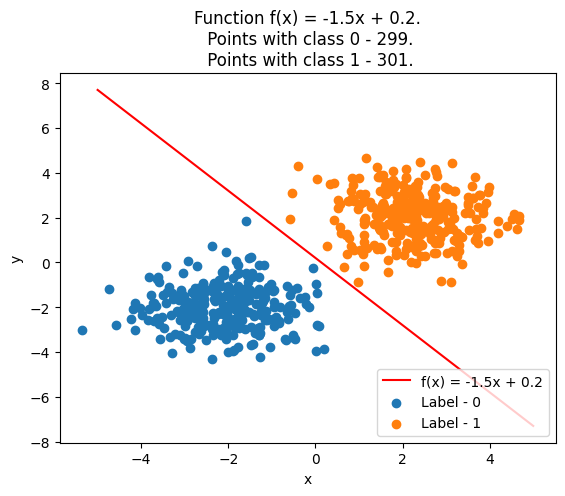

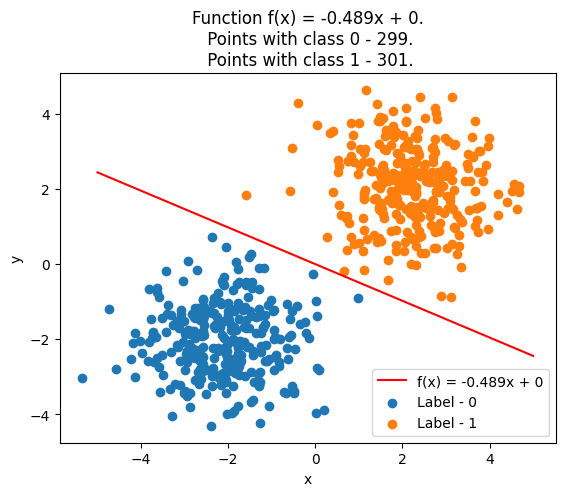

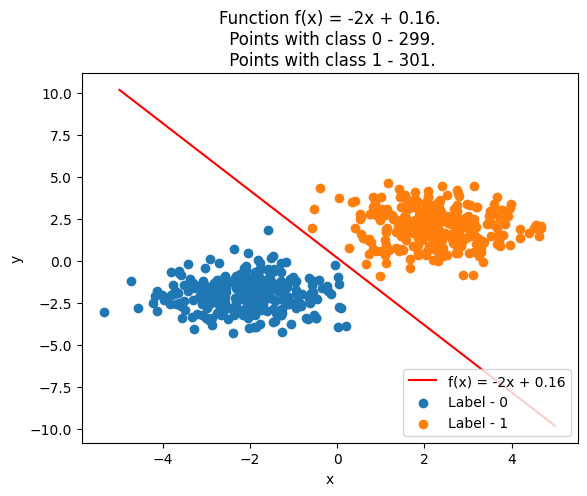

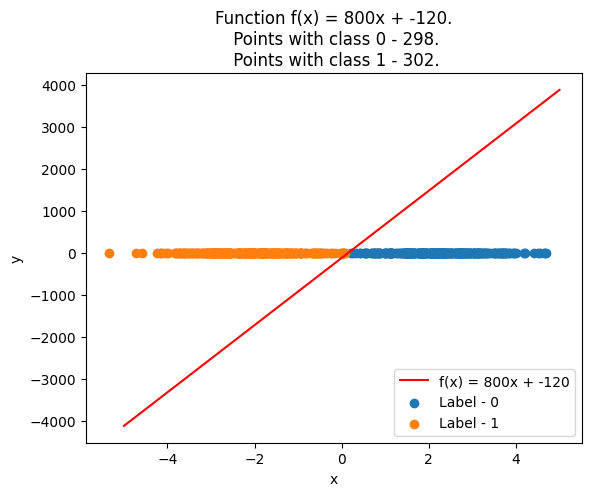

In [25]:
def main():
    x = list(range(-5,6))   
#Function f(x) = -1.5 + 0.2
    k_f = -1.5
    m_f = 0.2
    plot(k_f, m_f, x)

#Function t(x) = -0.489x
    k_t = -0.489
    m_t = 0
    plot(k_t, m_t, x)

#Function g(x) = -2x + 0.16
    k_g = -2
    m_g = 0.16
    plot(k_g, m_g, x)
#Function h(x) = 800x - 120
    k_h = 800
    m_h = -120
    plot(k_h, m_h, x)

if __name__=="__main__":
    main()